In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import glob
nombre_archivos=glob.glob("/home/rodolfo/Documentos/Analisis-Opinion-Publica-main/data/*.csv")

In [3]:
import unidecode
def quitar_acentos(texto):
    x = str(texto)
    x = unidecode.unidecode(x)
    return x
data=pd.concat(list(map(lambda x: pd.read_csv(x),nombre_archivos)))
data=data.reset_index()
data['review_español'] = data['review_español'].apply(quitar_acentos) 

Ahora vamos a empezar a modelar los datos

In [4]:
data.head()

,index,id,sentiment,review,review_español
0,0,6757_4,0,Odd slasher movie from Producer Charles Band. ...,Pelicula de Slasher Odd del productor Charles ...
1,1,11307_1,0,The Perfectly Stupid Weapon. I think the guys ...,El arma perfectamente estupida. Creo que los c...
2,2,9657_10,1,'Presque Rien' ('Come Undone') is an earlier w...,'Presque Rien' ('Ven a deshacer') es un trabaj...
3,3,7652_3,0,"In 1967, mine workers find the remnants of an ...","En 1967, los trabajadores de los mios encuentr..."
4,4,584_8,1,Excellent film dealing with the life of an old...,Excelente pelicula que lucha con la vida de un...


In [5]:
split = 0.85
d_train = data[:int(split*len(data))]
d_test = data[int((1-split)*len(data)):]

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [7]:
features = vectorizer.fit_transform(d_train["review_español"])
test_features = vectorizer.transform(d_test["review_español"])
i = 45000
j = 10
words = vectorizer.get_feature_names()[i:i+10]
#pd.DataFrame(features[j:j+7,i:i+10].todense(), columns=words)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(features, d_train["sentiment"])
pred1 = model1.predict_proba(test_features)

In [9]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5)
    auc = roc_auc_score(y_true, pred[:,1])
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plt.plot(fpr, tpr, color, linewidth="3")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    if ann:
        plt.annotate("Acc: %0.2f" % acc, (0.2,0.7), size=14)
        plt.annotate("AUC: %0.2f" % auc, (0.2,0.6), size=14)

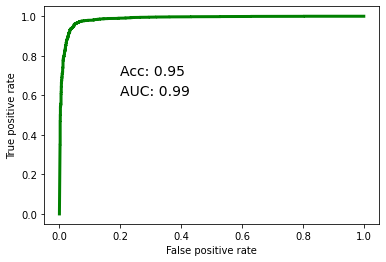

In [10]:
performance(d_test["sentiment"], pred1)

In [11]:
model1.predict(vectorizer.transform([quitar_acentos("feliz cumpleaños alfredo que sigas teniendo muchas bendiciones y exitos en tu vida, nada es imposible")]))

array([1])

In [12]:
model1.predict(vectorizer.transform([quitar_acentos("estúpido")]))

array([0])